In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-14589/Distance_Matrix.csv
/kaggle/input/data-14589/sample_submission.csv
/kaggle/input/data-14589/Biomass_History.csv


In [2]:
import numpy as np
import pandas as pd
from ortools.linear_solver import pywraplp
from ortools.sat.python import cp_model
model = cp_model.CpModel()
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import re
import copy
import random
import os
import time
#from ortools.graph.python import max_flow
from collections import Counter
import datetime as dt
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


from IPython.display import Latex

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = os.getcwd()
excel_filename = path + "/kaggle/input/data-14589/Distance_Matrix.csv"

In [4]:
def read_csv_to_matrix(file_path):
    df = pd.read_csv(file_path, header=None)
    matrix = df.values
    return matrix

In [5]:
dist_mat = pd.read_csv("/kaggle/input/data-14589/Distance_Matrix.csv")
Biomass_history=pd.read_csv("/kaggle/input/data-14589/Biomass_History.csv")
lat=Biomass_history['Latitude']
long=Biomass_history['Longitude']

In [6]:
Biomass_history

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885
...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,20.15456,72.84432,5.199882,4.516778,4.321080,2.658953,5.113997,5.301668,6.419223,5.321604
2414,2414,20.15456,72.92394,0.122287,0.126717,0.101494,0.111509,0.121749,0.122467,0.145785,0.120626
2415,2415,20.15456,73.00357,0.039415,0.040843,0.032713,0.035941,0.039241,0.039473,0.046989,0.038879
2416,2416,20.15456,73.08319,2.719220,1.370163,0.818687,1.205721,1.316443,1.324201,1.576338,1.304297


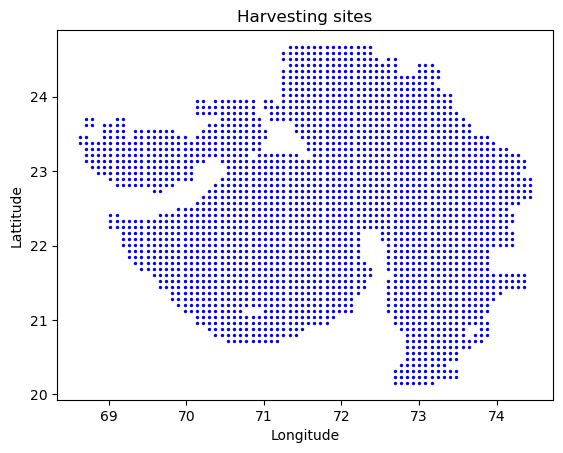

In [7]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(long, lat, color='blue', s=2)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Harvesting sites')

# Show the plot
plt.show()

In [8]:
dist_mat

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2414,2414,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2415,2415,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2416,2416,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [9]:
file_path = '/kaggle/input/data-14589/Distance_Matrix.csv'
distance_matrix = read_csv_to_matrix(file_path)

In [10]:
# Convert the matrix to a DataFrame
df = pd.DataFrame(distance_matrix)

In [11]:
df


,0,1,2,3,4,5,6,7,8,9,...,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418
0,NaN,0.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,...,2408.0000,2409.0000,2410.0000,2411.0000,2412.0000,2413.0000,2414.0000,2415.0000,2416.0000,2417.0000
1,0.0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
2,1.0,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
3,2.0,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
4,3.0,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,2413.0,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2415,2414.0,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2416,2415.0,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2417,2416.0,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [12]:
# Drop a row by index
index_to_drop = 0
df_dropped = df.drop(index_to_drop)
# Drop a column by label
column_to_drop = 0
df_dropped = df_dropped.drop(columns=column_to_drop)
df_dropped

,1,2,3,4,5,6,7,8,9,10,...,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418
1,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
2,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
3,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
4,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
5,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,617.7221,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2415,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,609.9671,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2416,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,610.2964,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2417,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,617.5381,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [13]:
Dist= df_dropped
len(Dist)

2418

In [14]:
Dist

,1,2,3,4,5,6,7,8,9,10,...,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418
1,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
2,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
3,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
4,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
5,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,617.7221,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2415,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,609.9671,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2416,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,610.2964,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2417,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,617.5381,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [15]:
Dist[8][1]

118.675

In [16]:
scale=1

num_harvesting_sites =len(Dist)
num_depots =len(Dist)
num_biorefs =len(Dist)

Harvesting_Site = range(num_harvesting_sites)
Depot = range(num_depots)
Refinery = range(num_biorefs)

ref_capacity=scale*100000
depot_capacity=scale*20000

In [17]:
scale=1  
### scaling will be required to get more accurate results as optimization model does not consider floating numbers

forecasted_biomass = Biomass_history['2017']
forecasted_biomass_scaled = scale*forecasted_biomass


total_forecasted_biomass_scaled=sum(forecasted_biomass_scaled)
total_forecasted_biomass_scaled

384857.0210760393

In [18]:
PC=[[] for i1  in Harvesting_Site]     #### Adjacency list for graph
IPC = [[] for i1  in Harvesting_Site]
for i1  in Harvesting_Site:
    for i2  in Harvesting_Site:
        if i1!=i2:
            if Dist[i1+1][i2+1]<=50:
                if Dist[i2+1][i1+1]<=50:
                    PC[i1].append(i2)  
                    IPC[i2].append(i1)

In [19]:
wt=[[] for i1  in Harvesting_Site ]
for i1  in Harvesting_Site:
    wt[i1]= (forecasted_biomass_scaled[i1])
    for i2 in PC[i1]:
        wt[i1]=wt[i1]+  forecasted_biomass_scaled[i2]      
max(wt),min(wt)

(27918.8349382, 6.017899943000001)

In [20]:
model = cp_model.CpModel()

x = {}
y=  {}
bio={}
excess={}

for i  in Harvesting_Site:
    bio[i]= model.NewIntVar(0,99999999,'') 
    excess[i]= model.NewIntVar(0,99999999,'') 
    for j in PC[i]:
        x[i,j] = model.NewIntVar(0,1,'') 
    #y[i] = model.NewIntVar(0,1,'')
        
        
obj= model.NewIntVar(0,9999999999,'') 

In [21]:
for i  in Harvesting_Site: 
    for j in PC[i]:
            model.Add(x[i,j]+x[j,i]<=1) 

In [22]:
for i  in Harvesting_Site: 
    for j in PC[i]:
        model.Add(sum([x[j,k] for k in PC[j]])==0).OnlyEnforceIf(x[i,j])

In [23]:
for i  in Harvesting_Site:
    model.Add(sum([x[i,j] for j in IPC[i] ])<=1)

In [24]:
for i in Harvesting_Site:
    model.Add(bio[i]==sum([int(forecasted_biomass_scaled[j])*x[i,j] for j in PC[i]])+int(forecasted_biomass_scaled[i]))
    model.Add(bio[i]<=(depot_capacity))
    #model.Add(excess[i]==depot_capacity-bio[i])

In [25]:
# for i  in Harvesting_Site: 
#     for j in PC[i]:
#         model.Add(x[i,j]<=y[i])
#model.Add(obj==sum([excess[j] for j in Harvesting_Site  ]))
model.Add(obj==sum([x[i,j] for i in Harvesting_Site  for j in PC[i]]))

In [26]:
model.Maximize(obj)
import time
start_time_cp = time.perf_counter()
print()   
#db = model.NewSearchPhase(s, cp_model.INT_VAR_SIMPLE, cp_model.INT_VALUE_SIMPLE_ORDERED)
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 500
solver.parameters.num_search_workers = 8
solver.parameters.log_search_progress = True
status = solver.Solve(model)
print(solver.StatusName(status))

print("Time =", time.perf_counter() - start_time_cp, "seconds")
Time_cp = time.perf_counter() - start_time_cp



Starting CP-SAT solver v9.4.1874
Parameters: max_time_in_seconds: 500 log_search_progress: true num_search_workers: 8

Initial optimization model '':
#Variables: 105711 (#ints:1 in objective)
  - 100874 Booleans in [0,1]
  - 4836 in [0,99999999]
  - 1 in [0,9999999999]
#kLinear1: 2420 (#enforced: 1)
#kLinear2: 100879 (#enforced: 2)
#kLinear3: 1
#kLinearN: 105703 (#enforced: 100871) (#terms: 4896829)

Starting presolve at 0.18s
[ExtractEncodingFromLinear] #potential_supersets=2416 #potential_subsets=0 #at_most_one_encodings=0 #exactly_one_encodings=0 #unique_terms=0 #multiple_terms=0 #literals=0 time=0.00620035s
[Probing] deterministic_time: 1 (limit: 1) wall_time: 2.08073 (Aborted 79436/100895)
[Probing]  - new binary clause: 2163
[Probing] implications and bool_or (work_done=8182022).
[SAT presolve] num removable Booleans: 4837 / 105711
[SAT presolve] num trivial clauses: 0
[SAT presolve] [0s] clauses:4696520 literals:9393040 vars:100874 one_side_vars:100874 simple_definition:0 sing

In [27]:
eliminated_locs =[]
cluster_reps = []
groupwise_locs = [[] for i  in Harvesting_Site]

cnt=0
for i  in Harvesting_Site:     
    for j in PC[i]:
        if solver.Value(x[i,j])>0:
            groupwise_locs[j].append(i)
            if j not in cluster_reps:
                cluster_reps.append(j)
            if i not in eliminated_locs:
                eliminated_locs.append(i)
groupwise_locs[1666]

[]

In [28]:
additional_locs=[]

for i  in Harvesting_Site: 
    if i not in eliminated_locs and i not in cluster_reps :
        print(i)
        additional_locs.append(i)
        cluster_reps.append(i)

4
415
831


In [29]:
len(set(eliminated_locs))

2260

In [30]:
print(cluster_reps)

[47, 38, 12, 97, 82, 63, 66, 140, 170, 178, 158, 225, 137, 255, 231, 302, 268, 314, 279, 370, 375, 392, 275, 204, 480, 428, 488, 447, 401, 455, 459, 535, 494, 453, 457, 618, 409, 528, 601, 669, 675, 628, 710, 722, 662, 483, 757, 704, 784, 815, 633, 795, 871, 892, 899, 772, 916, 866, 948, 920, 1000, 1031, 1042, 1070, 1029, 1102, 1115, 1076, 1146, 1176, 1190, 1192, 1217, 1224, 1086, 1265, 1296, 1241, 1336, 1420, 1323, 1345, 1371, 1316, 1456, 1470, 1431, 1246, 1308, 1508, 1463, 1543, 1441, 1624, 1597, 1549, 1618, 1574, 1642, 1589, 1603, 1665, 1675, 1684, 1694, 1478, 1728, 1744, 1760, 1809, 1779, 1841, 1821, 1825, 1830, 1845, 1908, 1915, 1981, 1993, 2000, 1837, 2041, 2004, 2035, 2060, 2010, 2110, 2119, 2128, 2104, 2116, 2167, 2179, 2182, 2146, 2196, 2207, 2256, 2274, 2268, 2295, 2337, 2315, 2258, 2332, 2328, 2356, 2350, 2361, 2373, 2379, 2405, 2409, 2416, 4, 415, 831]


In [31]:
#print(groupwise_locs)
Bio_fuel=[]
Groupwise_locs=[]
Cluster_reps = []

for i  in Harvesting_Site:   
    if len(groupwise_locs[i])>0:
        bio_fuel= forecasted_biomass_scaled[i]        
        for j in groupwise_locs[i]:
            bio_fuel=bio_fuel+ forecasted_biomass_scaled[j]
        Bio_fuel.append(bio_fuel)
        Groupwise_locs.append(groupwise_locs[i])
        Cluster_reps.append(i)
        print(i,groupwise_locs[i],bio_fuel)

12 [13] 7.183497995
38 [5, 6, 7, 8, 9, 10, 11, 21, 22, 23, 24, 25, 26, 37, 39] 1181.131717614
47 [0, 1, 2, 3, 14, 15, 16, 17, 18, 29, 30, 48, 50, 51] 1031.8356789
63 [44, 45, 46, 61, 64] 59.177338093
66 [65, 87] 37.39396524
82 [27, 28, 40, 41, 42, 43, 57, 58, 59, 60, 62, 79, 80, 83] 1180.6220936930001
97 [19, 20, 31, 32, 33, 34, 35, 36, 49, 52, 53, 54, 55, 56, 72, 73, 74, 75, 76, 78, 95, 96, 98] 3366.82820121
137 [112, 113, 138] 63.77625084500001
140 [67, 88, 89, 90, 114, 115, 116, 141] 98.231886582
158 [81, 84, 85, 86, 103, 104, 105, 106, 107, 108, 109, 132, 133, 134, 159] 1400.4896574279999
170 [68, 69, 70, 71, 91, 92, 93, 94, 117, 118, 119, 120, 121, 122, 142, 143, 144, 145, 146, 168, 169, 171, 205, 206, 207, 208, 209, 246, 247, 248, 287, 330] 1834.7606190229994
178 [77, 99, 100, 101, 102, 125, 126, 127, 128, 129, 130, 131, 153, 154, 155, 179] 2493.2157211000003
204 [245] 0.054017085000000006
225 [110, 111, 135, 136, 160, 161, 162, 163, 186, 187, 226] 624.3196764039999
231 [139, 164

In [32]:
# dictionary of lists
dict = {'Cluster_reps':Cluster_reps,
        'Groupwise_locs': Groupwise_locs,
        'Total_bio_fuel': Bio_fuel}
df = pd.DataFrame(dict)
df

,Cluster_reps,Groupwise_locs,Total_bio_fuel
0,12,[13],7.183498
1,38,"[5, 6, 7, 8, 9, 10, 11, 21, 22, 23, 24, 25, 26...",1181.131718
2,47,"[0, 1, 2, 3, 14, 15, 16, 17, 18, 29, 30, 48, 5...",1031.835679
3,63,"[44, 45, 46, 61, 64]",59.177338
4,66,"[65, 87]",37.393965
...,...,...,...
150,2373,"[2318, 2320, 2339, 2340, 2341, 2342, 2352, 235...",1133.646852
151,2379,"[2358, 2360, 2366, 2367, 2368, 2369, 2370, 237...",372.723214
152,2405,"[2375, 2376, 2381, 2382, 2384, 2389, 2390, 240...",500.915743
153,2409,"[2378, 2386, 2387, 2388, 2396, 2397, 2398, 239...",144.478271


In [33]:
Groups= [[] for i in range(len(Groupwise_locs)+len(additional_locs))]

for i in range(len(Groupwise_locs)):
    Groups[i].append(Cluster_reps[i])
    for j in Groupwise_locs[i]:
        Groups[i].append(j)

for i in range(len(additional_locs)):
    Groups[len(Groupwise_locs)+i].append(additional_locs[i])
print(Groups)

[[12, 13], [38, 5, 6, 7, 8, 9, 10, 11, 21, 22, 23, 24, 25, 26, 37, 39], [47, 0, 1, 2, 3, 14, 15, 16, 17, 18, 29, 30, 48, 50, 51], [63, 44, 45, 46, 61, 64], [66, 65, 87], [82, 27, 28, 40, 41, 42, 43, 57, 58, 59, 60, 62, 79, 80, 83], [97, 19, 20, 31, 32, 33, 34, 35, 36, 49, 52, 53, 54, 55, 56, 72, 73, 74, 75, 76, 78, 95, 96, 98], [137, 112, 113, 138], [140, 67, 88, 89, 90, 114, 115, 116, 141], [158, 81, 84, 85, 86, 103, 104, 105, 106, 107, 108, 109, 132, 133, 134, 159], [170, 68, 69, 70, 71, 91, 92, 93, 94, 117, 118, 119, 120, 121, 122, 142, 143, 144, 145, 146, 168, 169, 171, 205, 206, 207, 208, 209, 246, 247, 248, 287, 330], [178, 77, 99, 100, 101, 102, 125, 126, 127, 128, 129, 130, 131, 153, 154, 155, 179], [204, 245], [225, 110, 111, 135, 136, 160, 161, 162, 163, 186, 187, 226], [231, 139, 164, 165, 166, 167, 188, 189, 192, 193, 194, 232], [255, 123, 124, 147, 148, 149, 150, 151, 152, 172, 173, 174, 175, 176, 177, 213, 214, 215, 216, 256], [268, 190, 191, 227, 228, 229, 230, 269, 307]

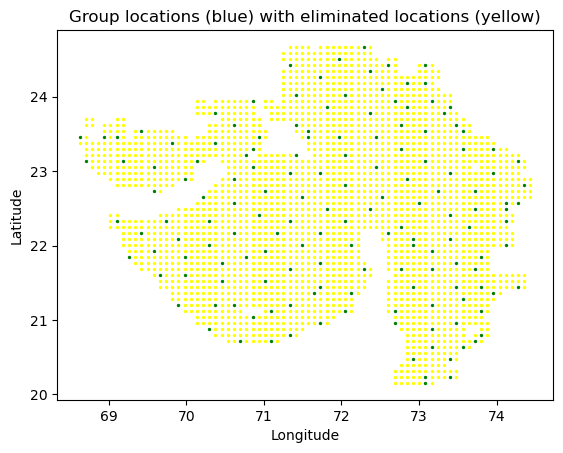

In [34]:
import matplotlib.pyplot as plt

# Create a scatter plot for selected cluster reference points
long_cr=[long[i] for i in Cluster_reps]
lat_cr=[lat[i] for i in Cluster_reps]

plt.scatter(long_cr, lat_cr, color='green', s=2)


# Create a scatter plot for eliminated points
long_el=[long[i] for i in eliminated_locs]
lat_el=[lat[i] for i in eliminated_locs]

plt.scatter(long_el, lat_el, color='yellow', s=2)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Group locations (blue) with eliminated locations (yellow)')

# Show the plot
plt.show()

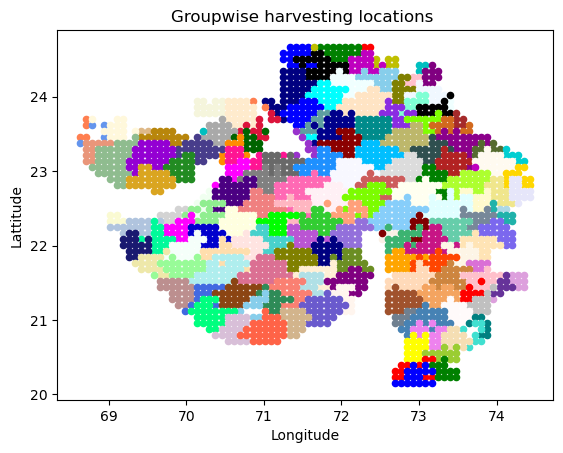

In [35]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


# use colormap
#colormap = ['r', 'g', 'b','y','c','m','k','pink','purple','skyblue','navy','azure','coral','olive']
colormap = ['r', 'g', 'b','y','c','m','k','pink','purple','skyblue','navy','azure','coral','olive',
    "AliceBlue", "Aqua", "Aquamarine", "Azure", "Beige", "Bisque", "Black",
    "BlanchedAlmond", "Blue", "BlueViolet", "Brown", "BurlyWood", "CadetBlue", "Chartreuse",
    "Chocolate", "Coral", "CornflowerBlue", "Cornsilk", "Crimson", "Cyan", "DarkBlue", "DarkCyan",
    "DarkGoldenRod", "DarkGray", "DarkGreen", "DarkKhaki", "DarkMagenta", "DarkOliveGreen",
    "DarkOrange", "DarkOrchid", "DarkRed", "DarkSalmon", "DarkSeaGreen", "DarkSlateBlue",
    "DarkSlateGray", "DarkTurquoise", "DarkViolet", "DeepPink", "DeepSkyBlue", "DimGray",
    "DodgerBlue", "FireBrick", "FloralWhite", "ForestGreen", "Fuchsia", "Gainsboro", "GhostWhite",
    "Gold", "GoldenRod", "Gray", "Green", "GreenYellow", "HoneyDew", "HotPink", "IndianRed",
    "Indigo", "Ivory", "Khaki", "Lavender", "LavenderBlush", "LawnGreen", "LemonChiffon",
    "LightBlue", "LightCoral", "LightCyan", "LightGoldenRodYellow", "LightGray", "LightGreen",
    "LightPink", "LightSalmon", "LightSeaGreen", "LightSkyBlue", "LightSlateGray", "LightSteelBlue",
    "LightYellow", "Lime", "LimeGreen", "Linen", "Magenta", "Maroon", "MediumAquaMarine",
    "MediumBlue", "MediumOrchid", "MediumPurple", "MediumSeaGreen", "MediumSlateBlue",
    "MediumSpringGreen", "MediumTurquoise", "MediumVioletRed", "MidnightBlue", "MintCream",
    "MistyRose", "Moccasin", "NavajoWhite", "Navy", "OldLace", "Olive", "OliveDrab", "Orange",
    "OrangeRed", "Orchid", "PaleGoldenRod", "PaleGreen", "PaleTurquoise", "PaleVioletRed",
    "PapayaWhip", "PeachPuff", "Peru", "Pink", "Plum", "PowderBlue", "Purple", "RebeccaPurple",
    "Red", "RosyBrown", "RoyalBlue", "SaddleBrown", "Salmon", "SandyBrown", "SeaGreen", "SeaShell",
    "Sienna", "Silver", "SkyBlue", "SlateBlue", "SlateGray", "Snow", "SpringGreen", "SteelBlue",
    "Tan", "Teal", "Thistle", "Tomato", "Turquoise", "Violet", "Wheat", 
    "Yellow", "YellowGreen"
]


for j in range(len(Groups)):
    long_temp=[long[i] for i in Groups[j]]
    lat_temp=[lat[i] for i in Groups[j]]
    plt.scatter(long_temp, lat_temp, color=colormap[j% len(colormap)], s=20)




# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Groupwise harvesting locations ')

# Show the plot
plt.show()


In [36]:
Dist_groups = Dist
grouplen= len(Groups)

for i in range(grouplen):
    group_captain = Groups[i][0]
    
    #print(group_captain)
    for k in Harvesting_Site:        
            #print(sum([Dist[j+1][k+1] for j in Groups[i]]))
            Dist_groups[group_captain+1][k+1]=  sum([Dist[j+1][k+1] for j in Groups[i]])
    
        
    

In [37]:
groupwise_biofuel =[0 for i in Harvesting_Site]

for i in range(grouplen):
    group_captain = Groups[i][0]     
    #print(group_captain)
    groupwise_biofuel[group_captain]=sum([forecasted_biomass_scaled[j] for j in Groups[i]])        
#print(groupwise_biofuel)
Cluster_reps

[12,
 38,
 47,
 63,
 66,
 82,
 97,
 137,
 140,
 158,
 170,
 178,
 204,
 225,
 231,
 255,
 268,
 275,
 279,
 302,
 314,
 370,
 375,
 392,
 401,
 409,
 428,
 447,
 453,
 455,
 457,
 459,
 480,
 483,
 488,
 494,
 528,
 535,
 601,
 618,
 628,
 633,
 662,
 669,
 675,
 704,
 710,
 722,
 757,
 772,
 784,
 795,
 815,
 866,
 871,
 892,
 899,
 916,
 920,
 948,
 1000,
 1029,
 1031,
 1042,
 1070,
 1076,
 1086,
 1102,
 1115,
 1146,
 1176,
 1190,
 1192,
 1217,
 1224,
 1241,
 1246,
 1265,
 1296,
 1308,
 1316,
 1323,
 1336,
 1345,
 1371,
 1420,
 1431,
 1441,
 1456,
 1463,
 1470,
 1478,
 1508,
 1543,
 1549,
 1574,
 1589,
 1597,
 1603,
 1618,
 1624,
 1642,
 1665,
 1675,
 1684,
 1694,
 1728,
 1744,
 1760,
 1779,
 1809,
 1821,
 1825,
 1830,
 1837,
 1841,
 1845,
 1908,
 1915,
 1981,
 1993,
 2000,
 2004,
 2010,
 2035,
 2041,
 2060,
 2104,
 2110,
 2116,
 2119,
 2128,
 2146,
 2167,
 2179,
 2182,
 2196,
 2207,
 2256,
 2258,
 2268,
 2274,
 2295,
 2315,
 2328,
 2332,
 2337,
 2350,
 2356,
 2361,
 2373,
 2379,
 24

In [38]:
Harvesting_Site_Group=cluster_reps
Depot_Group = cluster_reps
Refinery_Group = cluster_reps

total_groupwise_biomass = sum(groupwise_biofuel)

large_number = 999999999
A=1000
B=1
C=1

In [39]:
model = cp_model.CpModel()


#### Biomass demand-supply flow varivale 
Biomass = {}
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:        
        Biomass[i,j] = model.NewIntVar(0,int(groupwise_biofuel[i]),'depot_flow[%i,%i]' % (i, j))    ### C2 
        
#### Pellet transported  flow varivale        
Pellet =  {}
for j  in Depot_Group:  
    for k in Refinery_Group:        
        Pellet[j, k] = model.NewIntVar(0,depot_capacity,'refinary_flow[%i,%i]' % (j, k))  


      
 ###Three Objective variables

cost_transport =                model.NewIntVar(0,large_number,'cost_transport')
cost_transport_A =                model.NewIntVar(0,large_number,'cost_transport')
cost_transport_biomass =        model.NewIntVar(0,large_number,'cost_transport_biomass')
cost_transport_pellet =         model.NewIntVar(0,large_number,'cost_transport_pellet')
cost_forecast =                 model.NewIntVar(0,large_number,'cost_forecast')
cost_underutilization =         model.NewIntVar(0,large_number,'Cost_Underutilization')
cost=                           model.NewIntVar(0,large_number,'Cost')

In [40]:
#### Harvesting site- Depot binary varivale 
Site_Depot = {}
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:        
        Site_Depot[i,j] = model.NewIntVar(0,1,'site_depot[%i,%i]' % (i, j))   
        
        
#### Pellet transported  flow varivale        
Depot_Refinery =  {}
for j  in Depot_Group:  
    for k in Refinery_Group:        
        Depot_Refinery[j, k] = model.NewIntVar(0,1,'depot_refinery[%i,%i]' % (j, k))

In [41]:
#### Depot selection binary variable
dp = {}
for j in Depot_Group:
    dp[j] = model.NewIntVar(0,1,'depot' ) 
    
    
#### Refinery selection binary variable
rf = {}
for j in Refinery_Group:
    rf[j] = model.NewIntVar(0,1,'refinery' )

In [42]:
for j in Depot_Group:
    model.Add(sum([Pellet[j,k] for k  in Refinery_Group])<=depot_capacity) 

In [43]:
for k in Refinery_Group:
    model.Add(sum([Pellet[j,k] for j  in Depot_Group])<=ref_capacity) 

In [44]:
model.Add(sum([Pellet[j,k] for j  in Depot_Group for k in Refinery_Group ])>= int(0.8*total_groupwise_biomass))

In [45]:
model.Add(sum([Biomass[i,j] for j  in Depot_Group for i in Harvesting_Site_Group ])<= int(total_groupwise_biomass))

In [46]:
for j in Depot_Group:
    model.Add(sum([Biomass[i,j] for i  in Harvesting_Site_Group])==sum([Pellet[j,k] for k  in Refinery_Group]))

In [47]:
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:
        model.Add(Biomass[i,j]>0).OnlyEnforceIf(Site_Depot[i,j])
        model.Add(Biomass[i,j]==0).OnlyEnforceIf(Site_Depot[i,j].Not())
        #model.Add(z[i,j]<=dp[j])

In [48]:
for j  in Depot_Group:  
    for k in Refinery_Group:
        model.Add(Pellet[j,k]>0).OnlyEnforceIf(Depot_Refinery[j,k])
        model.Add(Pellet[j,k]==0).OnlyEnforceIf(Depot_Refinery[j,k].Not())
        #model.Add(z[i,j]<=dp[j])

In [49]:
model.Add(sum([dp[j] for j in Depot_Group])<=25)


In [50]:
model.Add(sum([rf[k] for k in Refinery_Group])<=5)

In [51]:
for j  in Depot_Group:  
    for k in Refinery_Group:        
        model.Add(Depot_Refinery[j,k]<=rf[k])
        #model.Add(Depot_Refinery[j,k]<=dp[j])
        
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:
        model.Add(Site_Depot[i,j]<=dp[j])
        

In [52]:
model.Add(cost_transport_biomass==sum([int(Dist_groups[i+1][j+1])*Site_Depot[i,j]  for i  in Harvesting_Site_Group for j  in Depot_Group]))

In [53]:
model.Add(cost_transport_pellet==sum([int(Dist_groups[j+1][k+1])*Depot_Refinery[j,k]   for j  in Depot_Group for k  in Refinery_Group]))

In [54]:
model.Add(cost_transport==cost_transport_biomass+cost_transport_pellet)

In [55]:
model.Add(cost_underutilization==(25*depot_capacity-sum([Biomass[i,j] for i  in Harvesting_Site_Group for j in Depot_Group]))+(5*ref_capacity-sum([Pellet[j,k] for k  in Refinery_Group for j in Depot_Group])))

In [56]:
model.AddDivisionEquality(cost_transport_A,cost_transport,A)

In [57]:
model.Add(cost==cost_transport_A+B*cost_forecast+C*cost_underutilization)

In [58]:
model.Minimize(cost)

In [59]:
import time
start_time_cp = time.perf_counter()
print()   
#db = model.NewSearchPhase(s, cp_model.INT_VAR_SIMPLE, cp_model.INT_VALUE_SIMPLE_ORDERED)
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 600
solver.parameters.num_search_workers = 8
#solver.parameters.search_branching = 8
solver.parameters.log_search_progress = True
status = solver.Solve(model)
print(solver.StatusName(status))

print("Time =", time.perf_counter() - start_time_cp, "seconds")
Time_cp = time.perf_counter() - start_time_cp



Starting CP-SAT solver v9.4.1874
Parameters: max_time_in_seconds: 600 log_search_progress: true num_search_workers: 8

Initial optimization model '':
#Variables: 100179 (#ints:1 in objective)
  - 50560 Booleans in [0,1]
  - 153 different domains in [0,999999999] with a largest complexity of 1.
  - 316 constants in {0} 
#kIntDiv: 1
#kLinear1: 99856 (#enforced: 99856)
#kLinear2: 49928
#kLinear3: 1
#kLinearN: 482 (#terms: 249957)

Starting presolve at 0.09s
[ExtractEncodingFromLinear] #potential_supersets=0 #potential_subsets=0 #at_most_one_encodings=0 #exactly_one_encodings=0 #unique_terms=0 #multiple_terms=0 #literals=0 time=0.00236365s
[Probing] deterministic_time: 1.00003 (limit: 1) wall_time: 5.39305 (Aborted 22950/50244)
[Probing]  - new integer bounds: 27
[Probing] implications and bool_or (work_done=184232).
[SAT presolve] num removable Booleans: 954 / 100179
[SAT presolve] num trivial clauses: 632
[SAT presolve] [0s] clauses:49612 literals:99224 vars:49928 one_side_vars:49928 s

In [60]:
print(solver.Value(cost))

230456


In [61]:
Final_depots = [j for j in Depot_Group if solver.Value(dp[j]) >0 ]
Final_refineries = [k for k in Refinery_Group if solver.Value(rf[k]) >0 ]
print(len(Final_depots), len(Final_refineries))

23 5


In [62]:
print('Depots:')
print(Final_depots)
print('\nRefineries:')
print(Final_refineries)

Depots:
[47, 38, 12, 97, 63, 170, 178, 158, 225, 137, 204, 535, 871, 892, 866, 948, 1042, 1102, 1146, 1086, 1456, 1760, 1779]

Refineries:
[47, 38, 370, 1441, 831]


In [63]:
print('Harvest_site_locs-->\tDepot\tDistance\tBiomass_flow')
print('-----------------------------')
for i  in Harvesting_Site_Group:    
        for j in Depot_Group:
            if solver.Value(Site_Depot[i,j])>0:
                print('%i\t\t\t%i\t%2.3f\t\t%i'%(i,j,Dist[i][j], solver.Value(Biomass[i,j])))

Harvest_site_locs-->	Depot	Distance	Biomass_flow
-----------------------------
38			38	0.000		1181
97			47	140.066		3366
97			38	73.815		3366
97			12	94.819		3366
97			97	0.000		3366
82			38	63.233		1180
82			12	70.757		1180
82			63	49.703		1180
178			38	85.261		2493
178			63	106.481		2493
178			158	81.893		2493
158			63	46.800		1400
158			158	0.000		1400
225			225	0.000		431
255			97	56.614		2598
255			170	59.596		2598
255			178	32.626		2598
302			38	120.696		4113
302			97	106.710		4113
302			63	89.611		4113
302			178	57.624		4113
302			158	50.025		4113
302			225	53.598		4113
268			63	99.774		2051
268			158	59.900		2051
268			225	30.169		2051
268			137	70.283		2051
392			12	180.390		3033
392			63	112.832		3033
392			158	72.958		3033
392			225	43.228		3033
392			137	83.342		3033
488			97	104.840		4111
488			178	79.936		4111
447			137	104.332		2067
535			535	0.000		654
494			178	107.053		4262
494			158	84.415		4262
494			225	76.462		4262
494			137	116.576		4262
618			225	86.430		5246
61

In [64]:
print('Depot-->\tRefinery\tDistance\t Pellet_flow')
print('----------------------------------------------------------')
for j  in Depot_Group:  
    for k in Refinery_Group:
        if solver.Value(Depot_Refinery[j,k])>0:
            print('%i\t\t%i\t\t%2.3f\t\t%i' %(j,k,Dist[j][k], solver.Value(Pellet[j,k])))

Depot-->	Refinery	Distance	 Pellet_flow
----------------------------------------------------------
47		47		0.000		7252
38		38		0.000		12333
12		47		71.624		7579
97		38		73.815		18877
63		47		31.409		14270
170		47		182.832		16085
178		38		85.261		19280
158		38		87.006		17352
225		47		92.395		19629
137		47		55.679		16659
204		47		268.029		16880
535		370		45.415		4867
871		831		250.732		17274
892		831		58.572		20000
866		370		149.856		18576
948		831		130.085		20000
1042		1441		210.452		20000
1102		1441		274.559		20000
1146		370		174.559		20000
1086		38		420.925		20000
1456		370		221.307		20000
1760		1441		321.472		20000
1779		831		231.506		17944


In [65]:
solver.Value(cost_underutilization)

230286

In [66]:
solver.Value(cost_transport_A)

170

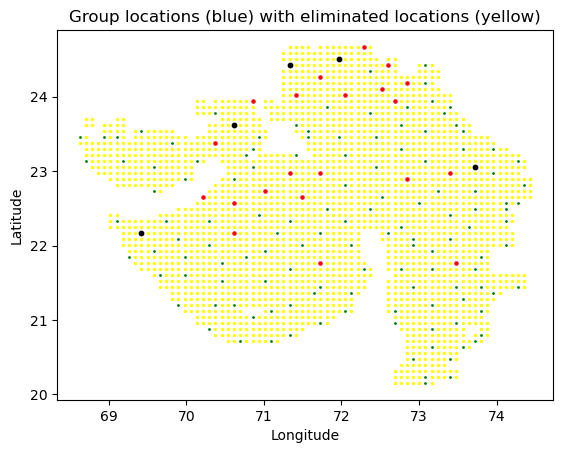

In [67]:
import matplotlib.pyplot as plt

# Create a scatter plot for selected cluster reference points
long_cr=[long[i] for i in Cluster_reps]
lat_cr=[lat[i] for i in Cluster_reps]

plt.scatter(long_cr, lat_cr, color='green', s=1)


# Create a scatter plot for eliminated points
long_el=[long[i] for i in eliminated_locs]
lat_el=[lat[i] for i in eliminated_locs]

plt.scatter(long_el, lat_el, color='yellow', s=2)


# Create a scatter plot for eliminated points
long_depot=[long[i] for i in Final_depots]
lat_depot=[lat[i] for i in Final_depots]

plt.scatter(long_depot, lat_depot, color='red', s=5)


# Create a scatter plot for eliminated points
long_ref=[long[i] for i in Final_refineries]
lat_ref=[lat[i] for i in Final_refineries]

plt.scatter(long_ref, lat_ref, color='black', s=10)



# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Group locations (blue) with eliminated locations (yellow)')

# Show the plot
plt.show()